# Binary Classification Breakoutroom

### Permasalahan

> Churn adalah salah satu peristiwa atau perilaku pelanggan beralih dari produk setelah (dalam jangka waktu tertentu) berlangganan produk. Produk dapat berupa barang atau jasa, seperti jaringan internet, penyedia telekomunikasi, dan sejenisnya. Dalam hal ini produk yang dianalisa adalah perusahaan telekomunikasi. Skema churn dapat dijelaskan dalam beberapa tahap. Tahap pertama, tahap ketika pelanggan berlangganan produk. Tahap kedua, yaitu rutinitas, atau perilaku pelanggan atau umpan balik pelanggan terhadap produk yang digunakan selama periode tertentu. Setelah itu, pada tahap ketiga, ada dua jenis, retensi (berlangganan kembali) atau churn (beralih atau berhenti berlangganan). Setiap perusahaan pasti ingin meminimalkan churn dan memaksimalkan retensi. Salah satu solusi yang dapat digunakan adalah dengan menggunakan prediksi churn pelanggan. Dengan ini, perusahaan dapat mengetahui karakteristik yang cenderung beralih atau berhenti berlangganan.

### Deskripsi Data

1.   Gender: Jenis kelamin pelanggan (Male, Female)
2.   Partner: Status pernikahan pelanggan (yes, no)
3.   Tenure: Lama beralangganan (integer; bulan)
4.   PhoneService: Apakah pelanggan menggunakan telfon (yes, no)
5.   PaperlessBilling:  Apakah pelanggan menggunakan paperless billing (yes, no)
6.   MonthlyCharges: Biaya bulanan (numeric; usd)
7.   Churn: Apakah pelanggan berhenti berlangganan atau tidak (yes, no)

> Dalam kasus ini kita akan melakukan prediksi Churn sebagai variabel respon.




## 1. Import Libraries and Data

IMPORT PACKAGES

In [1]:
# Import Package
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

IMPORT DATA

In [2]:
df = pd.read_csv("D:/Data Scientist/Dataset/Dataset - DS - 13/TelcoChurn.csv")
df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,Female,Yes,1,No,Yes,29.85,No
1,Male,No,34,Yes,No,56.95,No
2,Male,No,2,Yes,Yes,53.85,Yes
3,Male,No,45,No,No,42.30,No
4,Female,No,2,Yes,Yes,70.70,Yes


## 2. Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


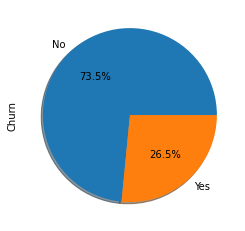

In [4]:
# Mencari perbandingan label/class
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

Dapat dilihat bahwa pelanggan yang TIDAK berhenti berlangganan ada 73.5% 

In [5]:
df.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


Dapat dilihat dari tenure bahwa minimal lama berlangganan adalah 0. Akan kita cari tahu apakah pelanggan yang menggunakan telfon(PhoneService) berpengaruh terhadap tenure?

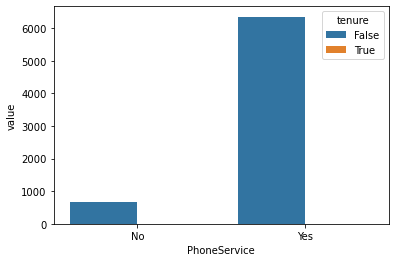

In [6]:
# Buat Crosstab antara phoneservice dan tenure
phoneservice_tenure = pd.crosstab(df['PhoneService'], (df['tenure']==0))

# Buat hasil crosstab menjadi dataframe
stacked = phoneservice_tenure.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.PhoneService, y=stacked.value, hue=stacked.tenure)
plt.show()

Dari hasil visualisasi diatas diketahui bahwa pelanggan yang menggunakan telfon memiliki tenure karena mereka mungkin lebih terikat dengan layanan yang diberikan. Dibandingkan dengan pelanggan yang tidak memiliki telfon.

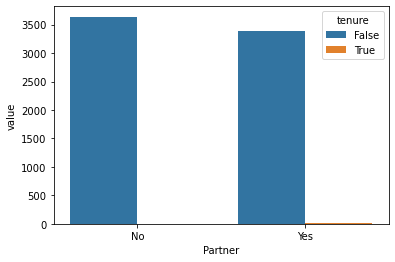

In [7]:
# Buat Crosstab antara phoneservice dan tenure
partner_tenure = pd.crosstab(df['Partner'], (df['tenure']==0))

# Buat hasil crosstab menjadi dataframe
stacked = partner_tenure.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.Partner, y=stacked.value, hue=stacked.tenure)
plt.show()

Apakah phone service berpengaruh pada PaperlessBilling??

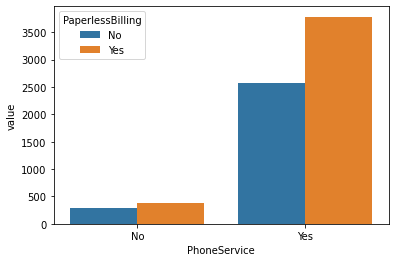

In [8]:
# Buat Crosstab antara phoneservice dan paperlessbilling
ps_pb = pd.crosstab(df['PhoneService'], (df['PaperlessBilling']))

# Buat hasil crosstab menjadi dataframe
stacked = ps_pb.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.PhoneService, y=stacked.value, hue=stacked.PaperlessBilling)
plt.show()

Dari hasil visualisai diatas dapat diketahui bahwa pelanggan yang menggunakan telfon juga menggunakan paperless billing.

Apakah ada pengaruh antara churn dengan status pernikahan dan kepemilikan ponsel?

In [9]:
churn = pd.crosstab([df["Partner"], df["PhoneService"]], (df["Churn"]))
churn

Churn                   No   Yes
Partner PhoneService            
No      No             262   109
        Yes           2179  1091
Yes     No             250    61
        Yes           2483   608

Pelanggan yang tidak memiliki pasangan dan menggunakan telfon kebanyakan tidak berhenti berlangganan.

Kita cek status pernikahan, apakah mempengaruhi churn?

<AxesSubplot:xlabel='Partner', ylabel='value'>

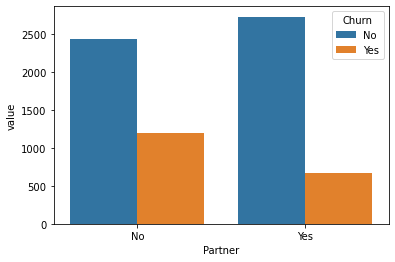

In [10]:
# Cek status pernikahan dan churn
duit = pd.crosstab(df['Partner'], (df['Churn']))

# Buat hasil crosstab menjadi dataframe
employ_stacked = duit.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=employ_stacked.Partner, y=employ_stacked.value, hue=employ_stacked.Churn)

Dari hasil visualisasi dapat diketahui bahwa pelanggan yang sudah menikah ataupun belum menikah merupakan pelanggan yang tidak berhenti berlangganan.

## 3 Preprocessing

Missing Value

In [11]:
# cek missing value
df.isnull().sum()

gender              0
Partner             0
tenure              0
PhoneService        0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Tidak ada missing value pada data

Label Encoder

In [12]:
kategori = ["gender", "Partner", "PhoneService", "PaperlessBilling", "Churn"]
df_cat = df[kategori]
df_cat.head()

,gender,Partner,PhoneService,PaperlessBilling,Churn
0,Female,Yes,No,Yes,No
1,Male,No,Yes,No,No
2,Male,No,Yes,Yes,Yes
3,Male,No,No,No,No
4,Female,No,Yes,Yes,Yes


In [13]:
encoded_data = LabelEncoder()

for feature in kategori :
    if feature in df.columns.values :
        df[feature] = encoded_data.fit_transform(df[feature])
        

df.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
0,0,1,1,0,1,29.85,0
1,1,0,34,1,0,56.95,0
2,1,0,2,1,1,53.85,1
3,1,0,45,0,0,42.30,0
4,0,0,2,1,1,70.70,1


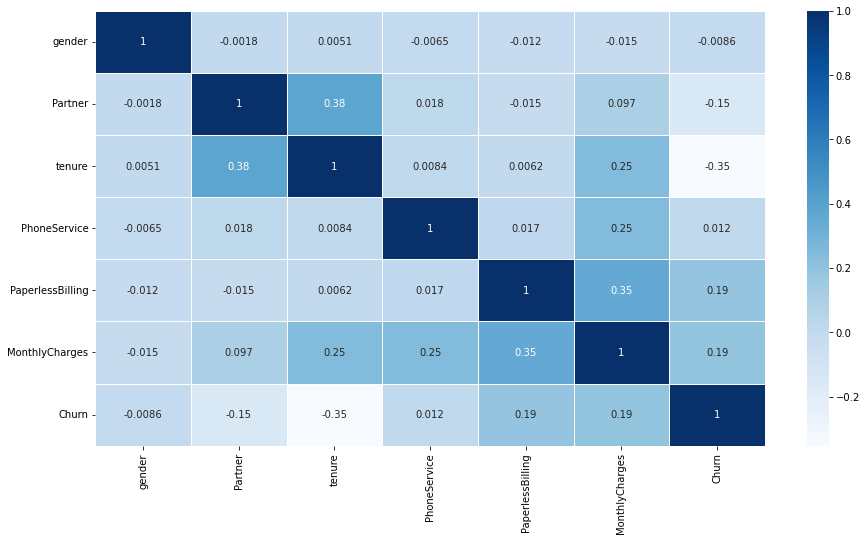

In [14]:
# Cek korelasi, mengasumsikan bahwa data bertime interval-rasio
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='Blues')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

> Variabel Partner dan tenure saling berkorelasi

In [15]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["Churn"].sort_values()
korelasi

tenure             -0.352229
Partner            -0.150448
gender             -0.008612
PhoneService        0.011942
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

## 5. Membangun Model Klasifikasi

MEMBAGI TRAIN TEST DATA

Menggunakan data testing berjumlah 30persen dari total data, dan data training berjumlah 70persen dari total data.

In [16]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  4930
y Train :  4930
X Test :  2113
t Test :  2113


### Stats Model (Logistic Regression)

In [17]:
Input = sm.add_constant(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
model = sm.Logit(y_train, X_train, missing='drop')
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.457227
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.206      
Dependent Variable: Churn            AIC:              4520.2572  
Date:               2024-04-03 07:04 BIC:              4559.2757  
No. Observations:   4930             Log-Likelihood:   -2254.1    
Df Model:           5                LL-Null:          -2838.9    
Df Residuals:       4924             LLR p-value:      1.1780e-250
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender            -0.2272   0.0704  -3.2269 0.0013 -0.3652 -0.0892
Partner           -0.1888   0.0785  -2.4052 0.0162 -0

Prediksi Model

In [19]:
prediction = result.predict(X_test)

In [20]:
pred_results = pd.DataFrame(prediction, columns = ["logreg_pred"])
pred_results["prediksi"] = pred_results['logreg_pred'].apply(lambda x: 1 if x > 0.5 else 0)
pred_results['actual'] = y_test
pred_results.head()

,logreg_pred,prediksi,actual
185,0.694126,1,1
2715,0.047231,0,0
3825,0.016265,0,0
1807,0.627099,1,1
132,0.016522,0,0


### Evaluation Model

In [21]:
print('Test accuracy =  {:.3f}'.format(accuracy_score(pred_results['actual'], pred_results["prediksi"])))
print('Test precision =  {:.3f}'.format(precision_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test recall =  {:.3f}'.format(recall_score(pred_results['actual'], pred_results["prediksi"], average='binary')))
print('Test f-score =  {:.3f}'.format(f1_score(pred_results['actual'], pred_results["prediksi"], average='binary')))

Test accuracy =  0.787
Test precision =  0.626
Test recall =  0.531
Test f-score =  0.575


### SKLEARN (Logistic Regression)

In [22]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred = LR.predict(X_test)
logreg_test = pd.merge(X_test, y_test, left_index=True, right_index=True, how='outer')
logreg_test['prediction'] = y_pred
logreg_test.head()

,gender,Partner,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,prediction
185,0,1,1,0,1,24.80,1,0
2715,1,0,41,1,1,25.25,0,0
3825,0,1,52,1,0,19.35,0,0
1807,0,0,1,1,0,76.35,1,1
132,1,0,67,1,0,50.55,0,0


In [24]:
print('Accuracy of logistic regression classifier train data: {:.3f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier test data: {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier train data: 0.788
Accuracy of logistic regression classifier test data: 0.790


Dari kedua model didapat bahwa akurasi model logistic regression dengan sklearn hasilnya hampir sama dengan statsmodels.

Pada model logistic regression dengan sklearn, perbedaan akurasi antara train data dan test data sangatlah dekat, hal ini memungkinkan bahwa model yang dihasilkan tidak overfitting.

## Klasifikasi dengan SVM

In [25]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("t Test : ", len(y_test))

X Train :  4930
y Train :  4930
X Test :  2113
t Test :  2113


#### Membangun model classifier dengan SVC kernel RBF

In [26]:
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [27]:
#akurasi train data
X_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_pred,y_train)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8399594320486815


In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1413  126]
 [ 325  249]]


In [29]:
#akurasi test data
test_data_accuracy = accuracy_score(y_pred,y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7865593942262187


Kernel Linier

In [30]:
classifier = SVC(kernel = 'linear', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#akurasi test data
print("Accuracy of SVM Classifier Training Data : {:.3f}".format(classifier.score(X_train, y_train)))
print("Accuracy of SVM Classifier Test Data : {:.3f}".format(classifier.score(X_test, y_test)))

Accuracy of SVM Classifier Training Data : 0.785
Accuracy of SVM Classifier Test Data : 0.794


Dengan menggunakan model sklearn antara logistic regression dengan SVM memiliki akurasi prediksi yang hampir sama.

In [31]:
from sklearn.model_selection import KFold
cv=KFold(shuffle=True, random_state=42)

In [32]:
cross_val_score(LogisticRegression(), X, y,cv=cv, scoring="f1").mean()

0.5382446939251421

In [33]:
cross_val_score(SVC(kernel="linear"), X, y, cv=cv, scoring="f1").mean()

0.5442247888219258

In [34]:
cross_val_score(SVC(kernel="rbf"), X, y, cv=cv, scoring="f1").mean()

0.48960775407686513

Mendapatkan AUC Score

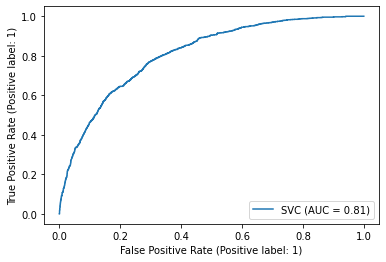

In [35]:
from sklearn.metrics import RocCurveDisplay
roc_disp = RocCurveDisplay.from_estimator(classifier, X_train, y_train)
roc_disp

Kurva ROC diatas menunjukkan bahwa model klasifikasi (SVC) memiliki kemampuan yang baik untuk membedakan antara kelas positif dan negatif.